In [1]:
!pip install pymongo

     |████████████████████████████████| 451 kB 29.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 20.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install tweepy

     |████████████████████████████████| 65 kB 5.6 MB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 63.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [6]:
!pip install twitter

     |████████████████████████████████| 50 kB 7.5 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [7]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

In [8]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

In [31]:
client = MongoClient(mongod_connect)
db = client.final_collection # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

authorize rush api

In [32]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [48]:
count = 100 #number of returned tweets, default and max is 100
geocode = "41.767905027663915,-72.67298591713418,80mi"  # defin the location, in Harrisonburg, VA
q = "covid" 

In [49]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Wed Dec 01 21:39:54 +0000 2021'
'Wed Dec 01 21:36:23 +0000 2021'
'Wed Dec 01 21:36:08 +0000 2021'
'Wed Dec 01 21:35:06 +0000 2021'
'Wed Dec 01 21:31:12 +0000 2021'
'Wed Dec 01 21:31:04 +0000 2021'
'Wed Dec 01 21:30:04 +0000 2021'
'Wed Dec 01 21:26:52 +0000 2021'
'Wed Dec 01 21:26:30 +0000 2021'
'Wed Dec 01 21:25:38 +0000 2021'
'Wed Dec 01 21:23:58 +0000 2021'
'Wed Dec 01 21:23:48 +0000 2021'
'Wed Dec 01 21:23:41 +0000 2021'
'Wed Dec 01 21:23:24 +0000 2021'
'Wed Dec 01 21:22:46 +0000 2021'
'Wed Dec 01 21:22:15 +0000 2021'
'Wed Dec 01 21:21:03 +0000 2021'
'Wed Dec 01 21:20:14 +0000 2021'
'Wed Dec 01 21:20:04 +0000 2021'
'Wed Dec 01 21:18:36 +0000 2021'
'Wed Dec 01 21:18:21 +0000 2021'
'Wed Dec 01 21:18:03 +0000 2021'
'Wed Dec 01 21:17:19 +0000 2021'
'Wed Dec 01 21:17:12 +0000 2021'
'Wed Dec 01 21:15:51 +0000 2021'
'Wed Dec 01 21:15:47 +0000 2021'
'Wed Dec 01 21:15:06 +0000 2021'
'Wed Dec 01 21:13:44 +0000 2021'
'Wed Dec 01 21:11:59 +0000 2021'
'Wed Dec 01 21:11:12 +0000 2021'
'Wed Dec 0

In [50]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Wed Dec 01 20:26:08 +0000 2021'
'Wed Dec 01 20:25:31 +0000 2021'
'Wed Dec 01 20:24:58 +0000 2021'
'Wed Dec 01 20:23:48 +0000 2021'
'Wed Dec 01 20:22:37 +0000 2021'
'Wed Dec 01 20:22:10 +0000 2021'
'Wed Dec 01 20:22:08 +0000 2021'
'Wed Dec 01 20:19:59 +0000 2021'
'Wed Dec 01 20:19:40 +0000 2021'
'Wed Dec 01 20:18:33 +0000 2021'
'Wed Dec 01 20:18:00 +0000 2021'
'Wed Dec 01 20:17:33 +0000 2021'
'Wed Dec 01 20:17:29 +0000 2021'
'Wed Dec 01 20:17:16 +0000 2021'
'Wed Dec 01 20:17:01 +0000 2021'
'Wed Dec 01 20:16:24 +0000 2021'
'Wed Dec 01 20:16:04 +0000 2021'
'Wed Dec 01 20:15:59 +0000 2021'
'Wed Dec 01 20:15:58 +0000 2021'
'Wed Dec 01 20:15:50 +0000 2021'
'Wed Dec 01 20:15:28 +0000 2021'
'Wed Dec 01 20:14:50 +0000 2021'
'Wed Dec 01 20:14:44 +0000 2021'
'Wed Dec 01 20:14:12 +0000 2021'
'Wed Dec 01 20:12:22 +0000 2021'
'Wed Dec 01 20:12:04 +0000 2021'
'Wed Dec 01 20:12:02 +0000 2021'
'Wed Dec 01 20:12:00 +0000 2021'
'Wed Dec 01 20:11:13 +0000 2021'
'Wed Dec 01 20:11:08 +0000 2021'
'Wed Dec 0

'Wed Dec 01 17:19:17 +0000 2021'
'Wed Dec 01 17:19:04 +0000 2021'
'Wed Dec 01 17:18:45 +0000 2021'
'Wed Dec 01 17:18:19 +0000 2021'
'Wed Dec 01 17:17:21 +0000 2021'
'Wed Dec 01 17:16:57 +0000 2021'
'Wed Dec 01 17:16:41 +0000 2021'
'Wed Dec 01 17:16:11 +0000 2021'
'Wed Dec 01 17:16:11 +0000 2021'
'Wed Dec 01 17:12:41 +0000 2021'
'Wed Dec 01 17:11:27 +0000 2021'
'Wed Dec 01 17:09:05 +0000 2021'
'Wed Dec 01 17:08:55 +0000 2021'
'Wed Dec 01 17:08:30 +0000 2021'
'Wed Dec 01 17:07:17 +0000 2021'
'Wed Dec 01 17:05:58 +0000 2021'
'Wed Dec 01 17:05:02 +0000 2021'
'Wed Dec 01 17:04:12 +0000 2021'
'Wed Dec 01 17:03:57 +0000 2021'
'Wed Dec 01 17:02:34 +0000 2021'
'Wed Dec 01 17:01:06 +0000 2021'
'Wed Dec 01 17:00:37 +0000 2021'
'Wed Dec 01 17:00:35 +0000 2021'
'Wed Dec 01 17:00:06 +0000 2021'
'Wed Dec 01 17:00:06 +0000 2021'
'Wed Dec 01 17:00:02 +0000 2021'
'Wed Dec 01 17:00:00 +0000 2021'
'Wed Dec 01 16:59:56 +0000 2021'
'Wed Dec 01 16:59:07 +0000 2021'
'Wed Dec 01 16:56:26 +0000 2021'
'Wed Dec 0

'Wed Dec 01 14:25:22 +0000 2021'
'Wed Dec 01 14:25:07 +0000 2021'
'Wed Dec 01 14:25:02 +0000 2021'
'Wed Dec 01 14:22:38 +0000 2021'
'Wed Dec 01 14:22:25 +0000 2021'
'Wed Dec 01 14:21:50 +0000 2021'
'Wed Dec 01 14:20:34 +0000 2021'
'Wed Dec 01 14:17:09 +0000 2021'
'Wed Dec 01 14:17:02 +0000 2021'
'Wed Dec 01 14:16:45 +0000 2021'
'Wed Dec 01 14:16:32 +0000 2021'
'Wed Dec 01 14:16:24 +0000 2021'
'Wed Dec 01 14:14:45 +0000 2021'
'Wed Dec 01 14:14:37 +0000 2021'
'Wed Dec 01 14:14:36 +0000 2021'
'Wed Dec 01 14:13:51 +0000 2021'
'Wed Dec 01 14:13:22 +0000 2021'
'Wed Dec 01 14:12:33 +0000 2021'
'Wed Dec 01 14:12:08 +0000 2021'
'Wed Dec 01 14:11:51 +0000 2021'
'Wed Dec 01 14:11:51 +0000 2021'
'Wed Dec 01 14:10:54 +0000 2021'
'Wed Dec 01 14:09:21 +0000 2021'
'Wed Dec 01 14:08:58 +0000 2021'
'Wed Dec 01 14:08:38 +0000 2021'
'Wed Dec 01 14:07:53 +0000 2021'
'Wed Dec 01 14:07:00 +0000 2021'
'Wed Dec 01 14:06:56 +0000 2021'
'Wed Dec 01 14:06:10 +0000 2021'
'Wed Dec 01 14:05:33 +0000 2021'
'Wed Dec 0

'Wed Dec 01 06:50:23 +0000 2021'
'Wed Dec 01 06:42:46 +0000 2021'
'Wed Dec 01 06:40:56 +0000 2021'
'Wed Dec 01 06:40:55 +0000 2021'
'Wed Dec 01 06:40:22 +0000 2021'
'Wed Dec 01 06:36:17 +0000 2021'
'Wed Dec 01 06:33:28 +0000 2021'
'Wed Dec 01 06:33:23 +0000 2021'
'Wed Dec 01 06:21:30 +0000 2021'
'Wed Dec 01 06:21:27 +0000 2021'
'Wed Dec 01 06:19:00 +0000 2021'
'Wed Dec 01 06:11:58 +0000 2021'
'Wed Dec 01 06:10:15 +0000 2021'
'Wed Dec 01 06:02:31 +0000 2021'
'Wed Dec 01 05:59:07 +0000 2021'
'Wed Dec 01 05:58:03 +0000 2021'
'Wed Dec 01 05:54:53 +0000 2021'
'Wed Dec 01 05:47:35 +0000 2021'
'Wed Dec 01 05:45:02 +0000 2021'
'Wed Dec 01 05:43:13 +0000 2021'
'Wed Dec 01 05:38:02 +0000 2021'
'Wed Dec 01 05:35:05 +0000 2021'
'Wed Dec 01 05:32:46 +0000 2021'
'Wed Dec 01 05:30:04 +0000 2021'
'Wed Dec 01 05:18:19 +0000 2021'
'Wed Dec 01 05:17:34 +0000 2021'
'Wed Dec 01 05:09:12 +0000 2021'
'Wed Dec 01 04:59:21 +0000 2021'
'Wed Dec 01 04:58:26 +0000 2021'
'Wed Dec 01 04:57:02 +0000 2021'
'Wed Dec 0

'Tue Nov 30 23:37:04 +0000 2021'
'Tue Nov 30 23:36:31 +0000 2021'
'Tue Nov 30 23:36:28 +0000 2021'
'Tue Nov 30 23:34:55 +0000 2021'
'Tue Nov 30 23:34:26 +0000 2021'
'Tue Nov 30 23:32:55 +0000 2021'
'Tue Nov 30 23:31:13 +0000 2021'
'Tue Nov 30 23:30:09 +0000 2021'
'Tue Nov 30 23:30:05 +0000 2021'
'Tue Nov 30 23:29:32 +0000 2021'
'Tue Nov 30 23:29:26 +0000 2021'
'Tue Nov 30 23:28:39 +0000 2021'
'Tue Nov 30 23:25:38 +0000 2021'
'Tue Nov 30 23:25:33 +0000 2021'
'Tue Nov 30 23:24:59 +0000 2021'
'Tue Nov 30 23:24:42 +0000 2021'
'Tue Nov 30 23:24:19 +0000 2021'
'Tue Nov 30 23:24:15 +0000 2021'
'Tue Nov 30 23:23:38 +0000 2021'
'Tue Nov 30 23:22:34 +0000 2021'
'Tue Nov 30 23:20:12 +0000 2021'
'Tue Nov 30 23:19:31 +0000 2021'
'Tue Nov 30 23:17:08 +0000 2021'
'Tue Nov 30 23:16:47 +0000 2021'
'Tue Nov 30 23:16:44 +0000 2021'
'Tue Nov 30 23:15:33 +0000 2021'
'Tue Nov 30 23:15:02 +0000 2021'
'Tue Nov 30 23:14:26 +0000 2021'
'Tue Nov 30 23:14:21 +0000 2021'
'Tue Nov 30 23:11:56 +0000 2021'
'Tue Nov 3

'Tue Nov 30 20:27:04 +0000 2021'
'Tue Nov 30 20:26:44 +0000 2021'
'Tue Nov 30 20:26:20 +0000 2021'
'Tue Nov 30 20:25:25 +0000 2021'
'Tue Nov 30 20:25:11 +0000 2021'
'Tue Nov 30 20:24:44 +0000 2021'
'Tue Nov 30 20:24:04 +0000 2021'
'Tue Nov 30 20:23:42 +0000 2021'
'Tue Nov 30 20:23:27 +0000 2021'
'Tue Nov 30 20:22:57 +0000 2021'
'Tue Nov 30 20:22:57 +0000 2021'
'Tue Nov 30 20:22:32 +0000 2021'
'Tue Nov 30 20:19:08 +0000 2021'
'Tue Nov 30 20:18:58 +0000 2021'
'Tue Nov 30 20:18:52 +0000 2021'
'Tue Nov 30 20:18:06 +0000 2021'
'Tue Nov 30 20:18:03 +0000 2021'
'Tue Nov 30 20:17:25 +0000 2021'
'Tue Nov 30 20:17:23 +0000 2021'
'Tue Nov 30 20:17:10 +0000 2021'
'Tue Nov 30 20:16:57 +0000 2021'
'Tue Nov 30 20:16:30 +0000 2021'
'Tue Nov 30 20:16:23 +0000 2021'
'Tue Nov 30 20:15:07 +0000 2021'
'Tue Nov 30 20:15:01 +0000 2021'
'Tue Nov 30 20:14:41 +0000 2021'
'Tue Nov 30 20:14:38 +0000 2021'
'Tue Nov 30 20:14:17 +0000 2021'
'Tue Nov 30 20:14:06 +0000 2021'
'Tue Nov 30 20:12:55 +0000 2021'
'Tue Nov 3

'Tue Nov 30 17:32:33 +0000 2021'
'Tue Nov 30 17:30:54 +0000 2021'
'Tue Nov 30 17:30:40 +0000 2021'
'Tue Nov 30 17:30:26 +0000 2021'
'Tue Nov 30 17:30:24 +0000 2021'
'Tue Nov 30 17:30:17 +0000 2021'
'Tue Nov 30 17:30:05 +0000 2021'
'Tue Nov 30 17:30:01 +0000 2021'
'Tue Nov 30 17:29:49 +0000 2021'
'Tue Nov 30 17:29:49 +0000 2021'
'Tue Nov 30 17:29:48 +0000 2021'
'Tue Nov 30 17:29:48 +0000 2021'
'Tue Nov 30 17:29:48 +0000 2021'
'Tue Nov 30 17:29:47 +0000 2021'
'Tue Nov 30 17:29:39 +0000 2021'
'Tue Nov 30 17:29:26 +0000 2021'
'Tue Nov 30 17:29:05 +0000 2021'
'Tue Nov 30 17:28:59 +0000 2021'
'Tue Nov 30 17:28:48 +0000 2021'
'Tue Nov 30 17:26:26 +0000 2021'
'Tue Nov 30 17:24:17 +0000 2021'
'Tue Nov 30 17:24:02 +0000 2021'
'Tue Nov 30 17:23:57 +0000 2021'
'Tue Nov 30 17:23:54 +0000 2021'
'Tue Nov 30 17:22:34 +0000 2021'
'Tue Nov 30 17:21:13 +0000 2021'
'Tue Nov 30 17:19:41 +0000 2021'
'Tue Nov 30 17:19:18 +0000 2021'
'Tue Nov 30 17:19:14 +0000 2021'
'Tue Nov 30 17:18:58 +0000 2021'
'Tue Nov 3

'Tue Nov 30 14:24:10 +0000 2021'
'Tue Nov 30 14:23:56 +0000 2021'
'Tue Nov 30 14:22:12 +0000 2021'
'Tue Nov 30 14:21:10 +0000 2021'
'Tue Nov 30 14:18:47 +0000 2021'
'Tue Nov 30 14:17:29 +0000 2021'
'Tue Nov 30 14:16:57 +0000 2021'
'Tue Nov 30 14:15:57 +0000 2021'
'Tue Nov 30 14:15:39 +0000 2021'
'Tue Nov 30 14:15:28 +0000 2021'
'Tue Nov 30 14:14:16 +0000 2021'
'Tue Nov 30 14:13:54 +0000 2021'
'Tue Nov 30 14:11:55 +0000 2021'
'Tue Nov 30 14:11:38 +0000 2021'
'Tue Nov 30 14:11:32 +0000 2021'
'Tue Nov 30 14:11:15 +0000 2021'
'Tue Nov 30 14:10:56 +0000 2021'
'Tue Nov 30 14:10:24 +0000 2021'
'Tue Nov 30 14:08:40 +0000 2021'
'Tue Nov 30 14:08:04 +0000 2021'
'Tue Nov 30 14:05:47 +0000 2021'
'Tue Nov 30 14:05:39 +0000 2021'
'Tue Nov 30 14:05:09 +0000 2021'
'Tue Nov 30 14:03:40 +0000 2021'
'Tue Nov 30 14:02:22 +0000 2021'
'Tue Nov 30 14:02:02 +0000 2021'
'Tue Nov 30 14:02:00 +0000 2021'
'Tue Nov 30 14:01:51 +0000 2021'
'Tue Nov 30 14:01:42 +0000 2021'
'Tue Nov 30 14:00:21 +0000 2021'
'Tue Nov 3

'Tue Nov 30 05:10:15 +0000 2021'
'Tue Nov 30 05:09:25 +0000 2021'
'Tue Nov 30 05:03:05 +0000 2021'
'Tue Nov 30 05:02:53 +0000 2021'
'Tue Nov 30 05:02:49 +0000 2021'
'Tue Nov 30 05:00:04 +0000 2021'
'Tue Nov 30 04:59:46 +0000 2021'
'Tue Nov 30 04:56:24 +0000 2021'
'Tue Nov 30 04:53:46 +0000 2021'
'Tue Nov 30 04:47:38 +0000 2021'
'Tue Nov 30 04:45:53 +0000 2021'
'Tue Nov 30 04:45:01 +0000 2021'
'Tue Nov 30 04:43:26 +0000 2021'
'Tue Nov 30 04:40:09 +0000 2021'
'Tue Nov 30 04:37:58 +0000 2021'
'Tue Nov 30 04:27:49 +0000 2021'
'Tue Nov 30 04:24:58 +0000 2021'
'Tue Nov 30 04:24:02 +0000 2021'
'Tue Nov 30 04:21:51 +0000 2021'
'Tue Nov 30 04:21:01 +0000 2021'
'Tue Nov 30 04:18:30 +0000 2021'
'Tue Nov 30 04:17:28 +0000 2021'
'Tue Nov 30 04:14:05 +0000 2021'
'Tue Nov 30 04:09:42 +0000 2021'
'Tue Nov 30 04:09:31 +0000 2021'
'Tue Nov 30 04:09:29 +0000 2021'
'Tue Nov 30 04:01:33 +0000 2021'
'Tue Nov 30 03:59:28 +0000 2021'
'Tue Nov 30 03:58:55 +0000 2021'
'Tue Nov 30 03:56:20 +0000 2021'
'Tue Nov 3

'Mon Nov 29 23:11:18 +0000 2021'
'Mon Nov 29 23:10:58 +0000 2021'
'Mon Nov 29 23:06:55 +0000 2021'
'Mon Nov 29 23:05:28 +0000 2021'
'Mon Nov 29 23:05:02 +0000 2021'
'Mon Nov 29 23:04:56 +0000 2021'
'Mon Nov 29 23:04:41 +0000 2021'
'Mon Nov 29 23:04:09 +0000 2021'
'Mon Nov 29 23:03:16 +0000 2021'
'Mon Nov 29 23:03:15 +0000 2021'
'Mon Nov 29 23:02:40 +0000 2021'
'Mon Nov 29 23:02:24 +0000 2021'
'Mon Nov 29 23:02:08 +0000 2021'
'Mon Nov 29 23:01:16 +0000 2021'
'Mon Nov 29 23:00:23 +0000 2021'
'Mon Nov 29 23:00:06 +0000 2021'
'Mon Nov 29 23:00:05 +0000 2021'
'Mon Nov 29 23:00:03 +0000 2021'
'Mon Nov 29 23:00:01 +0000 2021'
'Mon Nov 29 22:59:02 +0000 2021'
'Mon Nov 29 22:57:29 +0000 2021'
'Mon Nov 29 22:57:20 +0000 2021'
'Mon Nov 29 22:56:44 +0000 2021'
'Mon Nov 29 22:55:01 +0000 2021'
'Mon Nov 29 22:54:30 +0000 2021'
'Mon Nov 29 22:54:06 +0000 2021'
'Mon Nov 29 22:51:34 +0000 2021'
'Mon Nov 29 22:50:43 +0000 2021'
'Mon Nov 29 22:50:20 +0000 2021'
'Mon Nov 29 22:49:53 +0000 2021'
'Mon Nov 2

'Mon Nov 29 20:15:06 +0000 2021'
'Mon Nov 29 20:15:03 +0000 2021'
'Mon Nov 29 20:14:55 +0000 2021'
'Mon Nov 29 20:14:50 +0000 2021'
'Mon Nov 29 20:12:59 +0000 2021'
'Mon Nov 29 20:12:58 +0000 2021'
'Mon Nov 29 20:12:54 +0000 2021'
'Mon Nov 29 20:12:53 +0000 2021'
'Mon Nov 29 20:12:49 +0000 2021'
'Mon Nov 29 20:12:41 +0000 2021'
'Mon Nov 29 20:12:36 +0000 2021'
'Mon Nov 29 20:11:54 +0000 2021'
'Mon Nov 29 20:11:52 +0000 2021'
'Mon Nov 29 20:10:55 +0000 2021'
'Mon Nov 29 20:10:03 +0000 2021'
'Mon Nov 29 20:09:33 +0000 2021'
'Mon Nov 29 20:09:12 +0000 2021'
'Mon Nov 29 20:08:37 +0000 2021'
'Mon Nov 29 20:07:38 +0000 2021'
'Mon Nov 29 20:07:29 +0000 2021'
'Mon Nov 29 20:07:00 +0000 2021'
'Mon Nov 29 20:05:44 +0000 2021'
'Mon Nov 29 20:05:41 +0000 2021'
'Mon Nov 29 20:05:02 +0000 2021'
'Mon Nov 29 20:04:24 +0000 2021'
'Mon Nov 29 20:03:42 +0000 2021'
'Mon Nov 29 20:03:23 +0000 2021'
'Mon Nov 29 20:03:10 +0000 2021'
'Mon Nov 29 20:03:04 +0000 2021'
'Mon Nov 29 20:03:01 +0000 2021'
'Mon Nov 2

'Mon Nov 29 16:35:52 +0000 2021'
'Mon Nov 29 16:35:13 +0000 2021'
'Mon Nov 29 16:34:42 +0000 2021'
'Mon Nov 29 16:33:14 +0000 2021'
'Mon Nov 29 16:33:06 +0000 2021'
'Mon Nov 29 16:31:41 +0000 2021'
'Mon Nov 29 16:30:08 +0000 2021'
'Mon Nov 29 16:30:05 +0000 2021'
'Mon Nov 29 16:29:05 +0000 2021'
'Mon Nov 29 16:28:22 +0000 2021'
'Mon Nov 29 16:28:12 +0000 2021'
'Mon Nov 29 16:28:11 +0000 2021'
'Mon Nov 29 16:27:49 +0000 2021'
'Mon Nov 29 16:26:13 +0000 2021'
'Mon Nov 29 16:24:16 +0000 2021'
'Mon Nov 29 16:23:50 +0000 2021'
'Mon Nov 29 16:22:12 +0000 2021'
'Mon Nov 29 16:21:55 +0000 2021'
'Mon Nov 29 16:20:51 +0000 2021'
'Mon Nov 29 16:20:36 +0000 2021'
'Mon Nov 29 16:20:09 +0000 2021'
'Mon Nov 29 16:20:00 +0000 2021'
'Mon Nov 29 16:20:00 +0000 2021'
'Mon Nov 29 16:18:59 +0000 2021'
'Mon Nov 29 16:18:57 +0000 2021'
'Mon Nov 29 16:18:03 +0000 2021'
'Mon Nov 29 16:18:01 +0000 2021'
'Mon Nov 29 16:15:09 +0000 2021'
'Mon Nov 29 16:15:02 +0000 2021'
'Mon Nov 29 16:15:02 +0000 2021'
'Mon Nov 2

'Mon Nov 29 12:57:37 +0000 2021'
'Mon Nov 29 12:57:14 +0000 2021'
'Mon Nov 29 12:56:55 +0000 2021'
'Mon Nov 29 12:54:13 +0000 2021'
'Mon Nov 29 12:52:03 +0000 2021'
'Mon Nov 29 12:48:42 +0000 2021'
'Mon Nov 29 12:48:03 +0000 2021'
'Mon Nov 29 12:48:00 +0000 2021'
'Mon Nov 29 12:47:31 +0000 2021'
'Mon Nov 29 12:46:55 +0000 2021'
'Mon Nov 29 12:46:11 +0000 2021'
'Mon Nov 29 12:44:48 +0000 2021'
'Mon Nov 29 12:44:01 +0000 2021'
'Mon Nov 29 12:43:46 +0000 2021'
'Mon Nov 29 12:42:44 +0000 2021'
'Mon Nov 29 12:40:43 +0000 2021'
'Mon Nov 29 12:40:20 +0000 2021'
'Mon Nov 29 12:38:11 +0000 2021'
'Mon Nov 29 12:34:51 +0000 2021'
'Mon Nov 29 12:32:55 +0000 2021'
'Mon Nov 29 12:31:18 +0000 2021'
'Mon Nov 29 12:31:09 +0000 2021'
'Mon Nov 29 12:29:41 +0000 2021'
'Mon Nov 29 12:27:50 +0000 2021'
'Mon Nov 29 12:25:02 +0000 2021'
'Mon Nov 29 12:23:39 +0000 2021'
'Mon Nov 29 12:22:49 +0000 2021'
'Mon Nov 29 12:22:28 +0000 2021'
'Mon Nov 29 12:22:12 +0000 2021'
'Mon Nov 29 12:20:03 +0000 2021'
'Mon Nov 2

'Mon Nov 29 01:04:17 +0000 2021'
'Mon Nov 29 01:01:07 +0000 2021'
'Mon Nov 29 01:01:02 +0000 2021'
'Mon Nov 29 01:00:50 +0000 2021'
'Mon Nov 29 01:00:14 +0000 2021'
'Mon Nov 29 01:00:03 +0000 2021'
'Mon Nov 29 00:59:58 +0000 2021'
'Mon Nov 29 00:58:15 +0000 2021'
'Mon Nov 29 00:57:03 +0000 2021'
'Mon Nov 29 00:48:23 +0000 2021'
'Mon Nov 29 00:48:02 +0000 2021'
'Mon Nov 29 00:45:02 +0000 2021'
'Mon Nov 29 00:44:12 +0000 2021'
'Mon Nov 29 00:42:37 +0000 2021'
'Mon Nov 29 00:42:03 +0000 2021'
'Mon Nov 29 00:41:39 +0000 2021'
'Mon Nov 29 00:40:14 +0000 2021'
'Mon Nov 29 00:40:11 +0000 2021'
'Mon Nov 29 00:39:41 +0000 2021'
'Mon Nov 29 00:37:49 +0000 2021'
'Mon Nov 29 00:36:43 +0000 2021'
'Mon Nov 29 00:35:57 +0000 2021'
'Mon Nov 29 00:35:12 +0000 2021'
'Mon Nov 29 00:35:02 +0000 2021'
'Mon Nov 29 00:33:47 +0000 2021'
'Mon Nov 29 00:32:19 +0000 2021'
'Mon Nov 29 00:28:20 +0000 2021'
'Mon Nov 29 00:25:03 +0000 2021'
'Mon Nov 29 00:23:50 +0000 2021'
'Mon Nov 29 00:23:31 +0000 2021'
'Mon Nov 2

'Sun Nov 28 19:36:42 +0000 2021'
'Sun Nov 28 19:35:44 +0000 2021'
'Sun Nov 28 19:34:03 +0000 2021'
'Sun Nov 28 19:32:01 +0000 2021'
'Sun Nov 28 19:26:33 +0000 2021'
'Sun Nov 28 19:25:15 +0000 2021'
'Sun Nov 28 19:24:19 +0000 2021'
'Sun Nov 28 19:22:19 +0000 2021'
'Sun Nov 28 19:22:08 +0000 2021'
'Sun Nov 28 19:21:23 +0000 2021'
'Sun Nov 28 19:20:22 +0000 2021'
'Sun Nov 28 19:19:57 +0000 2021'
'Sun Nov 28 19:19:23 +0000 2021'
'Sun Nov 28 19:19:08 +0000 2021'
'Sun Nov 28 19:18:50 +0000 2021'
'Sun Nov 28 19:18:33 +0000 2021'
'Sun Nov 28 19:17:25 +0000 2021'
'Sun Nov 28 19:14:33 +0000 2021'
'Sun Nov 28 19:14:10 +0000 2021'
'Sun Nov 28 19:14:08 +0000 2021'
'Sun Nov 28 19:12:34 +0000 2021'
'Sun Nov 28 19:11:17 +0000 2021'
'Sun Nov 28 19:10:49 +0000 2021'
'Sun Nov 28 19:08:34 +0000 2021'
'Sun Nov 28 19:08:30 +0000 2021'
'Sun Nov 28 19:06:53 +0000 2021'
'Sun Nov 28 19:06:42 +0000 2021'
'Sun Nov 28 19:05:01 +0000 2021'
'Sun Nov 28 19:02:40 +0000 2021'
'Sun Nov 28 19:01:39 +0000 2021'
'Sun Nov 2

'Sun Nov 28 15:20:35 +0000 2021'
'Sun Nov 28 15:19:12 +0000 2021'
'Sun Nov 28 15:18:42 +0000 2021'
'Sun Nov 28 15:17:45 +0000 2021'
'Sun Nov 28 15:15:05 +0000 2021'
'Sun Nov 28 15:14:36 +0000 2021'
'Sun Nov 28 15:14:31 +0000 2021'
'Sun Nov 28 15:12:32 +0000 2021'
'Sun Nov 28 15:12:32 +0000 2021'
'Sun Nov 28 15:12:21 +0000 2021'
'Sun Nov 28 15:11:37 +0000 2021'
'Sun Nov 28 15:11:26 +0000 2021'
'Sun Nov 28 15:10:59 +0000 2021'
'Sun Nov 28 15:09:46 +0000 2021'
'Sun Nov 28 15:07:07 +0000 2021'
'Sun Nov 28 15:06:42 +0000 2021'
'Sun Nov 28 15:06:28 +0000 2021'
'Sun Nov 28 15:05:50 +0000 2021'
'Sun Nov 28 15:05:29 +0000 2021'
'Sun Nov 28 15:05:20 +0000 2021'
'Sun Nov 28 15:04:43 +0000 2021'
'Sun Nov 28 15:03:45 +0000 2021'
'Sun Nov 28 15:03:34 +0000 2021'
'Sun Nov 28 15:01:43 +0000 2021'
'Sun Nov 28 15:01:38 +0000 2021'
'Sun Nov 28 15:00:57 +0000 2021'
'Sun Nov 28 15:00:01 +0000 2021'
'Sun Nov 28 14:59:35 +0000 2021'
'Sun Nov 28 14:58:21 +0000 2021'
'Sun Nov 28 14:56:39 +0000 2021'
'Sun Nov 2

'Sun Nov 28 04:39:03 +0000 2021'
'Sun Nov 28 04:34:26 +0000 2021'
'Sun Nov 28 04:32:03 +0000 2021'
'Sun Nov 28 04:31:26 +0000 2021'
'Sun Nov 28 04:31:17 +0000 2021'
'Sun Nov 28 04:31:03 +0000 2021'
'Sun Nov 28 04:26:00 +0000 2021'
'Sun Nov 28 04:24:48 +0000 2021'
'Sun Nov 28 04:20:53 +0000 2021'
'Sun Nov 28 04:20:52 +0000 2021'
'Sun Nov 28 04:20:07 +0000 2021'
'Sun Nov 28 04:19:30 +0000 2021'
'Sun Nov 28 04:16:07 +0000 2021'
'Sun Nov 28 04:15:00 +0000 2021'
'Sun Nov 28 04:11:12 +0000 2021'
'Sun Nov 28 04:09:50 +0000 2021'
'Sun Nov 28 04:07:01 +0000 2021'
'Sun Nov 28 04:04:45 +0000 2021'
'Sun Nov 28 04:01:58 +0000 2021'
'Sun Nov 28 04:00:04 +0000 2021'
'Sun Nov 28 03:57:43 +0000 2021'
'Sun Nov 28 03:54:04 +0000 2021'
'Sun Nov 28 03:52:14 +0000 2021'
'Sun Nov 28 03:52:11 +0000 2021'
'Sun Nov 28 03:49:04 +0000 2021'
'Sun Nov 28 03:45:53 +0000 2021'
'Sun Nov 28 03:44:14 +0000 2021'
'Sun Nov 28 03:43:34 +0000 2021'
'Sun Nov 28 03:43:12 +0000 2021'
'Sun Nov 28 03:40:49 +0000 2021'
'Sun Nov 2

'Sat Nov 27 22:23:42 +0000 2021'
'Sat Nov 27 22:22:52 +0000 2021'
'Sat Nov 27 22:17:02 +0000 2021'
'Sat Nov 27 22:16:04 +0000 2021'
'Sat Nov 27 22:15:59 +0000 2021'
'Sat Nov 27 22:15:32 +0000 2021'
'Sat Nov 27 22:14:52 +0000 2021'
'Sat Nov 27 22:14:30 +0000 2021'
'Sat Nov 27 22:13:41 +0000 2021'
'Sat Nov 27 22:12:31 +0000 2021'
'Sat Nov 27 22:12:20 +0000 2021'
'Sat Nov 27 22:07:03 +0000 2021'
'Sat Nov 27 22:06:30 +0000 2021'
'Sat Nov 27 22:05:34 +0000 2021'
'Sat Nov 27 22:03:16 +0000 2021'
'Sat Nov 27 22:03:09 +0000 2021'
'Sat Nov 27 22:02:37 +0000 2021'
'Sat Nov 27 22:02:19 +0000 2021'
'Sat Nov 27 22:00:20 +0000 2021'
'Sat Nov 27 21:59:45 +0000 2021'
'Sat Nov 27 21:58:56 +0000 2021'
'Sat Nov 27 21:58:00 +0000 2021'
'Sat Nov 27 21:56:44 +0000 2021'
'Sat Nov 27 21:55:56 +0000 2021'
'Sat Nov 27 21:55:40 +0000 2021'
'Sat Nov 27 21:52:03 +0000 2021'
'Sat Nov 27 21:50:34 +0000 2021'
'Sat Nov 27 21:49:32 +0000 2021'
'Sat Nov 27 21:48:58 +0000 2021'
'Sat Nov 27 21:48:04 +0000 2021'
'Sat Nov 2

'Sat Nov 27 16:39:08 +0000 2021'
'Sat Nov 27 16:37:31 +0000 2021'
'Sat Nov 27 16:35:06 +0000 2021'
'Sat Nov 27 16:34:17 +0000 2021'
'Sat Nov 27 16:33:55 +0000 2021'
'Sat Nov 27 16:31:04 +0000 2021'
'Sat Nov 27 16:31:04 +0000 2021'
'Sat Nov 27 16:29:49 +0000 2021'
'Sat Nov 27 16:28:20 +0000 2021'
'Sat Nov 27 16:24:36 +0000 2021'
'Sat Nov 27 16:23:39 +0000 2021'
'Sat Nov 27 16:22:59 +0000 2021'
'Sat Nov 27 16:22:44 +0000 2021'
'Sat Nov 27 16:22:41 +0000 2021'
'Sat Nov 27 16:21:22 +0000 2021'
'Sat Nov 27 16:20:01 +0000 2021'
'Sat Nov 27 16:19:37 +0000 2021'
'Sat Nov 27 16:17:33 +0000 2021'
'Sat Nov 27 16:17:21 +0000 2021'
'Sat Nov 27 16:15:03 +0000 2021'
'Sat Nov 27 16:13:59 +0000 2021'
'Sat Nov 27 16:13:16 +0000 2021'
'Sat Nov 27 16:10:09 +0000 2021'
'Sat Nov 27 16:08:36 +0000 2021'
'Sat Nov 27 16:08:23 +0000 2021'
'Sat Nov 27 16:08:21 +0000 2021'
'Sat Nov 27 16:08:09 +0000 2021'
'Sat Nov 27 16:07:33 +0000 2021'
'Sat Nov 27 16:06:23 +0000 2021'
'Sat Nov 27 16:04:06 +0000 2021'
'Sat Nov 2

'Sat Nov 27 11:43:41 +0000 2021'
'Sat Nov 27 11:42:45 +0000 2021'
'Sat Nov 27 11:42:23 +0000 2021'
'Sat Nov 27 11:41:26 +0000 2021'
'Sat Nov 27 11:39:09 +0000 2021'
'Sat Nov 27 11:34:44 +0000 2021'
'Sat Nov 27 11:33:23 +0000 2021'
'Sat Nov 27 11:31:19 +0000 2021'
'Sat Nov 27 11:28:47 +0000 2021'
'Sat Nov 27 11:27:16 +0000 2021'
'Sat Nov 27 11:22:42 +0000 2021'
'Sat Nov 27 11:22:00 +0000 2021'
'Sat Nov 27 11:19:50 +0000 2021'
'Sat Nov 27 11:17:58 +0000 2021'
'Sat Nov 27 11:16:05 +0000 2021'
'Sat Nov 27 11:14:15 +0000 2021'
'Sat Nov 27 11:14:13 +0000 2021'
'Sat Nov 27 11:08:27 +0000 2021'
'Sat Nov 27 11:06:30 +0000 2021'
'Sat Nov 27 11:06:29 +0000 2021'
'Sat Nov 27 11:05:03 +0000 2021'
'Sat Nov 27 11:05:02 +0000 2021'
'Sat Nov 27 11:01:19 +0000 2021'
'Sat Nov 27 11:00:32 +0000 2021'
'Sat Nov 27 10:58:32 +0000 2021'
'Sat Nov 27 10:51:48 +0000 2021'
'Sat Nov 27 10:49:30 +0000 2021'
'Sat Nov 27 10:44:03 +0000 2021'
'Sat Nov 27 10:43:08 +0000 2021'
'Sat Nov 27 10:38:31 +0000 2021'
'Sat Nov 2

'Sat Nov 27 01:32:34 +0000 2021'
'Sat Nov 27 01:31:36 +0000 2021'
'Sat Nov 27 01:30:26 +0000 2021'
'Sat Nov 27 01:29:34 +0000 2021'
'Sat Nov 27 01:28:04 +0000 2021'
'Sat Nov 27 01:26:32 +0000 2021'
'Sat Nov 27 01:24:45 +0000 2021'
'Sat Nov 27 01:23:41 +0000 2021'
'Sat Nov 27 01:22:40 +0000 2021'
'Sat Nov 27 01:21:41 +0000 2021'
'Sat Nov 27 01:21:19 +0000 2021'
'Sat Nov 27 01:18:38 +0000 2021'
'Sat Nov 27 01:16:19 +0000 2021'
'Sat Nov 27 01:15:39 +0000 2021'
'Sat Nov 27 01:14:26 +0000 2021'
'Sat Nov 27 01:13:18 +0000 2021'
'Sat Nov 27 01:12:32 +0000 2021'
'Sat Nov 27 01:11:29 +0000 2021'
'Sat Nov 27 01:11:23 +0000 2021'
'Sat Nov 27 01:09:11 +0000 2021'
'Sat Nov 27 01:08:03 +0000 2021'
'Sat Nov 27 01:06:11 +0000 2021'
'Sat Nov 27 01:04:34 +0000 2021'
'Sat Nov 27 01:01:49 +0000 2021'
'Sat Nov 27 00:56:03 +0000 2021'
'Sat Nov 27 00:54:15 +0000 2021'
'Sat Nov 27 00:52:23 +0000 2021'
'Sat Nov 27 00:52:05 +0000 2021'
'Sat Nov 27 00:48:43 +0000 2021'
'Sat Nov 27 00:48:29 +0000 2021'
'Sat Nov 2

'Fri Nov 26 21:00:03 +0000 2021'
'Fri Nov 26 21:00:01 +0000 2021'
'Fri Nov 26 21:00:00 +0000 2021'
'Fri Nov 26 21:00:00 +0000 2021'
'Fri Nov 26 21:00:00 +0000 2021'
'Fri Nov 26 20:59:50 +0000 2021'
'Fri Nov 26 20:59:00 +0000 2021'
'Fri Nov 26 20:58:49 +0000 2021'
'Fri Nov 26 20:58:17 +0000 2021'
'Fri Nov 26 20:57:10 +0000 2021'
'Fri Nov 26 20:56:59 +0000 2021'
'Fri Nov 26 20:56:23 +0000 2021'
'Fri Nov 26 20:56:22 +0000 2021'
'Fri Nov 26 20:55:27 +0000 2021'
'Fri Nov 26 20:54:50 +0000 2021'
'Fri Nov 26 20:52:22 +0000 2021'
'Fri Nov 26 20:52:22 +0000 2021'
'Fri Nov 26 20:52:06 +0000 2021'
'Fri Nov 26 20:51:47 +0000 2021'
'Fri Nov 26 20:50:10 +0000 2021'
'Fri Nov 26 20:48:47 +0000 2021'
'Fri Nov 26 20:46:59 +0000 2021'
'Fri Nov 26 20:46:53 +0000 2021'
'Fri Nov 26 20:45:00 +0000 2021'
'Fri Nov 26 20:44:30 +0000 2021'
'Fri Nov 26 20:44:20 +0000 2021'
'Fri Nov 26 20:44:19 +0000 2021'
'Fri Nov 26 20:43:44 +0000 2021'
'Fri Nov 26 20:42:32 +0000 2021'
'Fri Nov 26 20:41:03 +0000 2021'
'Fri Nov 2

'Fri Nov 26 17:19:04 +0000 2021'
'Fri Nov 26 17:16:03 +0000 2021'
'Fri Nov 26 17:15:28 +0000 2021'
'Fri Nov 26 17:14:21 +0000 2021'
'Fri Nov 26 17:13:24 +0000 2021'
'Fri Nov 26 17:12:08 +0000 2021'
'Fri Nov 26 17:11:36 +0000 2021'
'Fri Nov 26 17:11:28 +0000 2021'
'Fri Nov 26 17:11:04 +0000 2021'
'Fri Nov 26 17:08:47 +0000 2021'
'Fri Nov 26 17:08:27 +0000 2021'
'Fri Nov 26 17:07:36 +0000 2021'
'Fri Nov 26 17:05:56 +0000 2021'
'Fri Nov 26 17:05:06 +0000 2021'
'Fri Nov 26 17:04:26 +0000 2021'
'Fri Nov 26 17:04:21 +0000 2021'
'Fri Nov 26 17:04:13 +0000 2021'
'Fri Nov 26 17:03:23 +0000 2021'
'Fri Nov 26 17:01:37 +0000 2021'
'Fri Nov 26 17:01:04 +0000 2021'
'Fri Nov 26 17:00:26 +0000 2021'
'Fri Nov 26 17:00:17 +0000 2021'
'Fri Nov 26 16:56:30 +0000 2021'
'Fri Nov 26 16:55:28 +0000 2021'
'Fri Nov 26 16:55:03 +0000 2021'
'Fri Nov 26 16:53:54 +0000 2021'
'Fri Nov 26 16:53:47 +0000 2021'
'Fri Nov 26 16:53:23 +0000 2021'
'Fri Nov 26 16:53:20 +0000 2021'
'Fri Nov 26 16:52:49 +0000 2021'
'Fri Nov 2

'Fri Nov 26 13:28:44 +0000 2021'
'Fri Nov 26 13:28:29 +0000 2021'
'Fri Nov 26 13:27:20 +0000 2021'
'Fri Nov 26 13:26:54 +0000 2021'
'Fri Nov 26 13:25:51 +0000 2021'
'Fri Nov 26 13:25:08 +0000 2021'
'Fri Nov 26 13:22:11 +0000 2021'
'Fri Nov 26 13:20:13 +0000 2021'
'Fri Nov 26 13:20:11 +0000 2021'
'Fri Nov 26 13:20:03 +0000 2021'
'Fri Nov 26 13:19:56 +0000 2021'
'Fri Nov 26 13:18:48 +0000 2021'
'Fri Nov 26 13:18:35 +0000 2021'
'Fri Nov 26 13:17:37 +0000 2021'
'Fri Nov 26 13:15:41 +0000 2021'
'Fri Nov 26 13:11:42 +0000 2021'
'Fri Nov 26 13:10:21 +0000 2021'
'Fri Nov 26 13:07:16 +0000 2021'
'Fri Nov 26 13:07:08 +0000 2021'
'Fri Nov 26 13:06:05 +0000 2021'
'Fri Nov 26 13:05:06 +0000 2021'
'Fri Nov 26 13:03:31 +0000 2021'
'Fri Nov 26 13:01:17 +0000 2021'
'Fri Nov 26 13:00:04 +0000 2021'
'Fri Nov 26 12:59:59 +0000 2021'
'Fri Nov 26 12:59:47 +0000 2021'
'Fri Nov 26 12:59:20 +0000 2021'
'Fri Nov 26 12:59:12 +0000 2021'
'Fri Nov 26 12:57:07 +0000 2021'
'Fri Nov 26 12:56:37 +0000 2021'
'Fri Nov 2

'Thu Nov 25 23:26:07 +0000 2021'
'Thu Nov 25 23:22:24 +0000 2021'
'Thu Nov 25 23:18:10 +0000 2021'
'Thu Nov 25 23:16:55 +0000 2021'
'Thu Nov 25 23:14:58 +0000 2021'
'Thu Nov 25 23:10:13 +0000 2021'
'Thu Nov 25 23:09:31 +0000 2021'
'Thu Nov 25 23:06:23 +0000 2021'
'Thu Nov 25 23:00:41 +0000 2021'
'Thu Nov 25 22:56:09 +0000 2021'
'Thu Nov 25 22:53:27 +0000 2021'
'Thu Nov 25 22:50:58 +0000 2021'
'Thu Nov 25 22:47:22 +0000 2021'
'Thu Nov 25 22:46:55 +0000 2021'
'Thu Nov 25 22:46:38 +0000 2021'
'Thu Nov 25 22:46:25 +0000 2021'
'Thu Nov 25 22:40:44 +0000 2021'
'Thu Nov 25 22:37:34 +0000 2021'
'Thu Nov 25 22:37:18 +0000 2021'
'Thu Nov 25 22:36:07 +0000 2021'
'Thu Nov 25 22:34:40 +0000 2021'
'Thu Nov 25 22:31:24 +0000 2021'
'Thu Nov 25 22:30:41 +0000 2021'
'Thu Nov 25 22:30:22 +0000 2021'
'Thu Nov 25 22:21:33 +0000 2021'
'Thu Nov 25 22:20:06 +0000 2021'
'Thu Nov 25 22:11:23 +0000 2021'
'Thu Nov 25 22:06:35 +0000 2021'
'Thu Nov 25 21:59:42 +0000 2021'
'Thu Nov 25 21:59:22 +0000 2021'
'Thu Nov 2

'Thu Nov 25 14:45:28 +0000 2021'
'Thu Nov 25 14:42:16 +0000 2021'
'Thu Nov 25 14:40:15 +0000 2021'
'Thu Nov 25 14:36:59 +0000 2021'
'Thu Nov 25 14:35:27 +0000 2021'
'Thu Nov 25 14:33:53 +0000 2021'
'Thu Nov 25 14:33:14 +0000 2021'
'Thu Nov 25 14:30:02 +0000 2021'
'Thu Nov 25 14:29:59 +0000 2021'
'Thu Nov 25 14:29:56 +0000 2021'
'Thu Nov 25 14:28:46 +0000 2021'
'Thu Nov 25 14:28:28 +0000 2021'
'Thu Nov 25 14:28:13 +0000 2021'
'Thu Nov 25 14:27:57 +0000 2021'
'Thu Nov 25 14:26:08 +0000 2021'
'Thu Nov 25 14:25:50 +0000 2021'
'Thu Nov 25 14:25:29 +0000 2021'
'Thu Nov 25 14:22:32 +0000 2021'
'Thu Nov 25 14:21:04 +0000 2021'
'Thu Nov 25 14:19:35 +0000 2021'
'Thu Nov 25 14:18:54 +0000 2021'
'Thu Nov 25 14:18:53 +0000 2021'
'Thu Nov 25 14:16:57 +0000 2021'
'Thu Nov 25 14:14:14 +0000 2021'
'Thu Nov 25 14:12:04 +0000 2021'
'Thu Nov 25 14:07:42 +0000 2021'
'Thu Nov 25 14:04:43 +0000 2021'
'Thu Nov 25 14:04:16 +0000 2021'
'Thu Nov 25 14:03:24 +0000 2021'
'Thu Nov 25 14:02:18 +0000 2021'
'Thu Nov 2

'Thu Nov 25 02:23:04 +0000 2021'
'Thu Nov 25 02:21:58 +0000 2021'
'Thu Nov 25 02:21:55 +0000 2021'
'Thu Nov 25 02:21:06 +0000 2021'
'Thu Nov 25 02:19:50 +0000 2021'
'Thu Nov 25 02:17:21 +0000 2021'
'Thu Nov 25 02:13:51 +0000 2021'
'Thu Nov 25 02:12:40 +0000 2021'
'Thu Nov 25 02:11:54 +0000 2021'
'Thu Nov 25 02:11:36 +0000 2021'
'Thu Nov 25 02:09:13 +0000 2021'
'Thu Nov 25 02:08:22 +0000 2021'
'Thu Nov 25 02:05:17 +0000 2021'
'Thu Nov 25 02:05:00 +0000 2021'
'Thu Nov 25 02:02:18 +0000 2021'
'Thu Nov 25 02:02:08 +0000 2021'
'Thu Nov 25 02:00:21 +0000 2021'
'Thu Nov 25 01:58:04 +0000 2021'
'Thu Nov 25 01:55:34 +0000 2021'
'Thu Nov 25 01:55:11 +0000 2021'
'Thu Nov 25 01:54:59 +0000 2021'
'Thu Nov 25 01:54:39 +0000 2021'
'Thu Nov 25 01:53:22 +0000 2021'
'Thu Nov 25 01:52:27 +0000 2021'
'Thu Nov 25 01:51:50 +0000 2021'
'Thu Nov 25 01:50:15 +0000 2021'
'Thu Nov 25 01:47:45 +0000 2021'
'Thu Nov 25 01:47:24 +0000 2021'
'Thu Nov 25 01:46:25 +0000 2021'
'Thu Nov 25 01:41:16 +0000 2021'
'Thu Nov 2

'Wed Nov 24 20:13:16 +0000 2021'
'Wed Nov 24 20:13:11 +0000 2021'
'Wed Nov 24 20:12:48 +0000 2021'
'Wed Nov 24 20:12:40 +0000 2021'
'Wed Nov 24 20:11:01 +0000 2021'
'Wed Nov 24 20:06:24 +0000 2021'
'Wed Nov 24 20:06:04 +0000 2021'
'Wed Nov 24 20:05:49 +0000 2021'
'Wed Nov 24 20:04:43 +0000 2021'
'Wed Nov 24 20:04:42 +0000 2021'
'Wed Nov 24 20:02:50 +0000 2021'
'Wed Nov 24 20:02:10 +0000 2021'
'Wed Nov 24 20:02:03 +0000 2021'
'Wed Nov 24 20:01:45 +0000 2021'
'Wed Nov 24 20:01:30 +0000 2021'
'Wed Nov 24 20:00:19 +0000 2021'
'Wed Nov 24 20:00:14 +0000 2021'
'Wed Nov 24 20:00:13 +0000 2021'
'Wed Nov 24 19:59:38 +0000 2021'
'Wed Nov 24 19:57:36 +0000 2021'
'Wed Nov 24 19:57:04 +0000 2021'
'Wed Nov 24 19:54:32 +0000 2021'
'Wed Nov 24 19:53:23 +0000 2021'
'Wed Nov 24 19:53:05 +0000 2021'
'Wed Nov 24 19:52:56 +0000 2021'
'Wed Nov 24 19:52:23 +0000 2021'
'Wed Nov 24 19:51:52 +0000 2021'
'Wed Nov 24 19:50:51 +0000 2021'
'Wed Nov 24 19:49:21 +0000 2021'
'Wed Nov 24 19:49:04 +0000 2021'
'Wed Nov 2

'Wed Nov 24 16:14:58 +0000 2021'
'Wed Nov 24 16:13:43 +0000 2021'
'Wed Nov 24 16:12:36 +0000 2021'
'Wed Nov 24 16:09:53 +0000 2021'
'Wed Nov 24 16:09:43 +0000 2021'
'Wed Nov 24 16:08:45 +0000 2021'
'Wed Nov 24 16:08:35 +0000 2021'
'Wed Nov 24 16:08:33 +0000 2021'
'Wed Nov 24 16:07:31 +0000 2021'
'Wed Nov 24 16:07:30 +0000 2021'
'Wed Nov 24 16:07:00 +0000 2021'
'Wed Nov 24 16:06:49 +0000 2021'
'Wed Nov 24 16:06:04 +0000 2021'
'Wed Nov 24 16:05:03 +0000 2021'
'Wed Nov 24 16:03:37 +0000 2021'
'Wed Nov 24 16:02:35 +0000 2021'
'Wed Nov 24 16:01:10 +0000 2021'
'Wed Nov 24 16:01:05 +0000 2021'
'Wed Nov 24 16:00:00 +0000 2021'
'Wed Nov 24 15:59:15 +0000 2021'
'Wed Nov 24 15:58:40 +0000 2021'
'Wed Nov 24 15:57:32 +0000 2021'
'Wed Nov 24 15:57:14 +0000 2021'
'Wed Nov 24 15:56:11 +0000 2021'
'Wed Nov 24 15:56:04 +0000 2021'
'Wed Nov 24 15:55:25 +0000 2021'
'Wed Nov 24 15:54:59 +0000 2021'
'Wed Nov 24 15:54:44 +0000 2021'
'Wed Nov 24 15:54:17 +0000 2021'
'Wed Nov 24 15:54:11 +0000 2021'
'Wed Nov 2

'Wed Nov 24 09:00:38 +0000 2021'
'Wed Nov 24 08:54:58 +0000 2021'
'Wed Nov 24 08:44:34 +0000 2021'
'Wed Nov 24 08:43:42 +0000 2021'
'Wed Nov 24 08:41:00 +0000 2021'
'Wed Nov 24 08:34:02 +0000 2021'
'Wed Nov 24 08:33:53 +0000 2021'
'Wed Nov 24 08:18:09 +0000 2021'
'Wed Nov 24 08:14:55 +0000 2021'
'Wed Nov 24 08:14:54 +0000 2021'
'Wed Nov 24 08:14:53 +0000 2021'
'Wed Nov 24 08:14:52 +0000 2021'
'Wed Nov 24 08:14:52 +0000 2021'
'Wed Nov 24 08:14:52 +0000 2021'
'Wed Nov 24 08:14:51 +0000 2021'
'Wed Nov 24 08:14:50 +0000 2021'
'Wed Nov 24 08:14:50 +0000 2021'
'Wed Nov 24 08:14:48 +0000 2021'
'Wed Nov 24 08:14:46 +0000 2021'
'Wed Nov 24 08:07:39 +0000 2021'
'Wed Nov 24 08:06:50 +0000 2021'
'Wed Nov 24 08:06:49 +0000 2021'
'Wed Nov 24 08:06:47 +0000 2021'
'Wed Nov 24 08:06:46 +0000 2021'
'Wed Nov 24 08:06:45 +0000 2021'
'Wed Nov 24 08:06:44 +0000 2021'
'Wed Nov 24 08:06:43 +0000 2021'
'Wed Nov 24 08:06:42 +0000 2021'
'Wed Nov 24 08:06:42 +0000 2021'
'Wed Nov 24 08:06:40 +0000 2021'
'Wed Nov 2

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&geocode=41.767905027663915%2C-72.67298591713418%2C80mi&max_id=1463311714636677121&oauth_consumer_key=uHvizo6EmsBOVBzm5Rda1PlrT&oauth_nonce=6342304362210787687&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1638395000&oauth_token=60388598-MNOLnSnLK8ZJwWh2isDw0ojr0NXqc57nmNJ4ML4Z4&oauth_version=1.0&q=covid&oauth_signature=UKj29maoSK%2Fwu9tXu9XJ3mQbM%2Fc%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

In [51]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

8683
4059


In [52]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index

'text_index'

In [31]:
tweet_cursor =tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

In [32]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: GreySlitaz
text: @RealStewPeters Patents For Covid19, Covid19 Vaccine And Covid19 Vaccine Ingredients Since 2002!!! 💥The (cont) https://t.co/A9GOsLxBBU
----
name: GreySlitaz
text: Patents For Covid19, Covid19 Vaccine And Covid19 Vaccine Ingredients Since 2002!!! 💥The patent and the (cont) https://t.co/dHK3OmVc3A
----
name: GreySlitaz
text: @Teachme64 Patents For Covid19, Covid19 Vaccine And Covid19 Vaccine Ingredients Since 2002!!! 💥The patent and the (… https://t.co/A9aiNHd58r
----
name: Brian Miller, M.D., M.B.A., M.P.H.
text: @drdanchoi @AmerMedicalAssn Really glad that you and others are highlighting these problems

#covid19 #physicianburnout #life #COVID19
----
name: @SmartRestartAPS
text: #Arlington #COVID19 #Cases

If you have a kid at #Taylor, hopefully you received notices of the 6 COVID19 cases there so far this week...
----
name: Friends of the GF
text: .@SamanthaJPower is right. #COVID19 is devastating  the fight against #TB. 

However, #COVID19 presents us with 

In [33]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

In [34]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,61956f74f383ba568d497f1a,Thu Nov 11 02:25:25 +0000 2021,1458621857834446848,1458621857834446848,"@RealStewPeters Patents For Covid19, Covid19 V...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.twitlonger.com"" rel=""nofol...",NaN,...,0,0,False,False,False,en,NaN,NaN,NaN,NaN
1,61956f74f383ba568d497f19,Thu Nov 11 02:28:29 +0000 2021,1458622631301857283,1458622631301857283,"Patents For Covid19, Covid19 Vaccine And Covid...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.twitlonger.com"" rel=""nofol...",NaN,...,2,2,False,False,False,en,NaN,NaN,NaN,NaN
2,61956f74f383ba568d497f17,Thu Nov 11 02:32:36 +0000 2021,1458623664140824582,1458623664140824582,"@Teachme64 Patents For Covid19, Covid19 Vaccin...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.458601e+18,...,2,2,False,False,False,en,NaN,NaN,NaN,NaN
3,61956f40f383ba568d497573,Wed Nov 17 03:03:47 +0000 2021,1460805842144567297,1460805842144567297,@drdanchoi @AmerMedicalAssn Really glad that y...,False,"{'hashtags': [{'text': 'covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.460806e+18,...,0,2,False,False,NaN,en,NaN,NaN,NaN,NaN
4,61956f65f383ba568d497c19,Fri Nov 12 19:07:39 +0000 2021,1459236467276976128,1459236467276976128,#Arlington #COVID19 #Cases\n\nIf you have a ki...,False,"{'hashtags': [{'text': 'Arlington', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.459236e+18,...,0,1,False,False,NaN,en,NaN,NaN,NaN,NaN
5,61956f7af383ba568d498048,Wed Nov 10 16:52:00 +0000 2021,1458477551857410048,1458477551857410048,.@SamanthaJPower is right. #COVID19 is devasta...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,2,False,False,False,en,1.458193e+18,1458192816002248708,{'created_at': 'Tue Nov 09 22:00:33 +0000 2021...,NaN
6,61956f5cf383ba568d497a79,Sat Nov 13 20:12:02 +0000 2021,1459615055717277712,1459615055717277712,Attending the 🌎 #hypertension &amp; #COVID19 s...,True,"{'hashtags': [{'text': 'hypertension', 'indice...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://sproutsocial.com"" rel=""nofoll...",NaN,...,6,19,False,False,False,en,NaN,NaN,NaN,NaN
7,61956f7ff383ba568d498119,Wed Nov 10 07:22:45 +0000 2021,1458334298398871562,1458334298398871562,3/7 35 #COVID19 @UofCAHealth inpatients are o...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.mangotree.com"" rel=""nofoll...",1.458334e+18,...,0,2,False,False,False,en,NaN,NaN,NaN,NaN
8,61956f40f383ba568d497562,Wed Nov 17 04:03:30 +0000 2021,1460820869253513217,1460820869253513217,3/7 32 #COVID19 @UofCAHealth inpatients are o...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.mangotree.com"" rel=""nofoll...",1.460821e+18,...,0,0,False,False,False,en,NaN,NaN,NaN,NaN
9,61956f31f383ba568d497411,Wed Nov 17 18:00:30 +0000 2021,1461031507439542286,1461031507439542286,❓ Can drinking alcohol prevent #COVID19? \n❌ N...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://sproutsocial.com"" rel=""nofoll...",NaN,...,8,9,False,False,False,en,NaN,NaN,NaN,NaN


<AxesSubplot:>

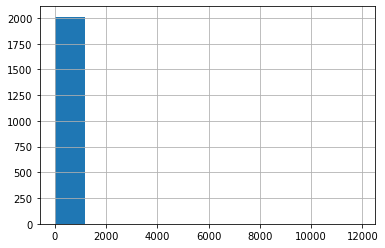

In [35]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count